In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('emails.csv')

In [11]:
df.head(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df['Email No.'].is_unique

True

In [10]:
df = df.drop(columns=['Email No.'])

In [6]:
percent_spam = {k:round((v/len(df)),2) for (k,v) in df['Prediction'].value_counts().to_dict().items()}

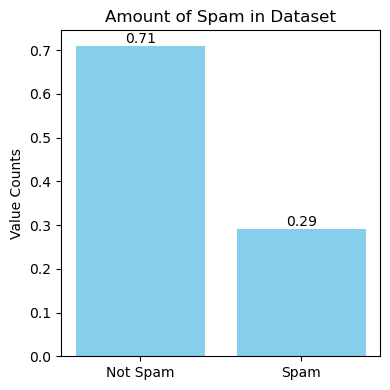

In [9]:
plot_dc(percent_spam, x_labels = ['Not Spam', 'Spam'])

In [4]:
def plot_dc(data, x_labels=None, y_label='Value Counts', title='Amount of Spam in Dataset'):

    categories = list(data.keys())
    values = list(data.values())
    
    if x_labels == None:
        x_labels=categories
        
    x = range(len(categories))
    
    plt.figure(figsize=(4, 4))
    bars = plt.bar(x, values, color='skyblue')

    #plt.xlabel('Categories')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(x, x_labels)  # Set x-tick labels to dictionary keys

    # Annotate bars with their height values
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                     ha='center', va='bottom', fontsize=10)

    add_labels(bars)

    plt.tight_layout()
    plt.show()

In [12]:
X= df.drop(columns='Prediction')
y= df['Prediction']

In [13]:
X['word_count'] = X.sum(axis=1)

In [14]:
def count_values_above_zero(row):
    return (row > 0).sum()

X['num_unique_words'] = X.apply(count_values_above_zero, axis=1)

In [15]:
spam_df = df[df['Prediction'] == 1]
spam_X = X.loc[spam_df.index]

ham_df = df[df['Prediction'] == 0]
ham_X = X.loc[ham_df.index]

In [37]:
def plot_mean(df1, df2, column_name, labels=['spam', 'ham']):
    mean_df1 = df1[column_name].mean()
    mean_df2 = df2[column_name].mean()
    
    means = pd.DataFrame({
        'DataFrame': labels,
        'Mean': [mean_df1, mean_df2]
    })
    
    ax = means.plot(kind='barh', x='DataFrame', y='Mean', figsize=(6,4), color=['orange', 'skyblue'], legend=False)
    
    plt.title(f'Mean {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Spam?')
    
    for index, value in enumerate(means['Mean']):
        ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')
    
    lowest_mean = min([mean_df1, mean_df2])
    highest_mean = max([mean_df1, mean_df2])
    difference = highest_mean - lowest_mean
    
    plt.xlim(lowest_mean - difference/3, highest_mean + difference/3)
    plt.show()

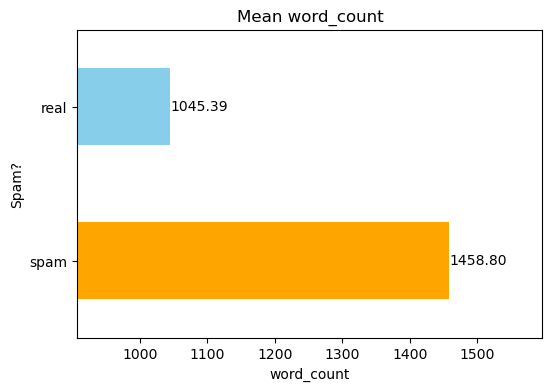

In [38]:
plot_mean(spam_X, ham_X, 'word_count', labels = ['spam', 'real'])

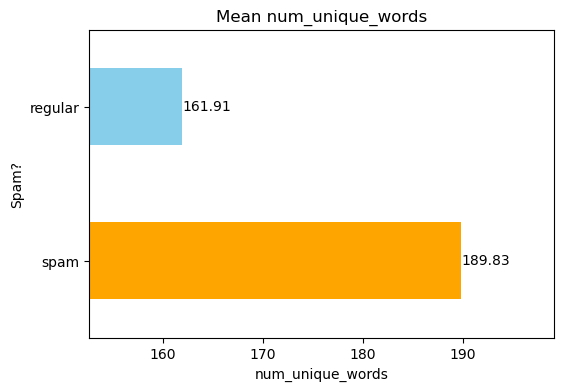

In [44]:
plot_mean(spam_X, ham_X, 'num_unique_words', labels = ['spam', 'regular'])

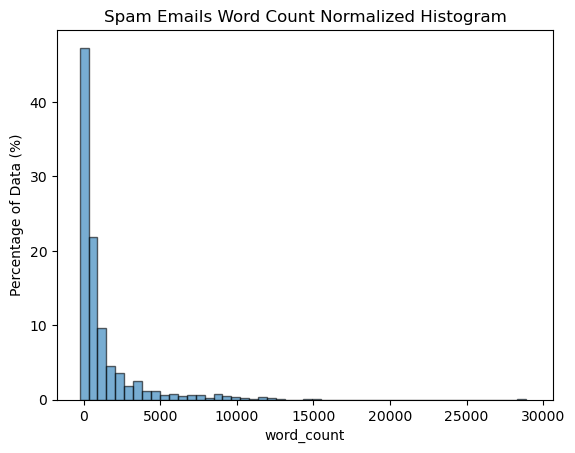

In [41]:
plt.hist(spam_X.word_count, bins=50, density=True, alpha=0.6, color='g')

# Normalize the histogram by scaling the bin heights as percentages
counts, bins, patches = plt.hist(spam_X.word_count, bins=50, density=True, alpha=0.6, color='g')

# Convert density to percentage
bin_width = bins[1] - bins[0]
percentage_counts = counts * bin_width * 100

# Plot percentage histogram
plt.bar(bins[:-1], percentage_counts, width=bin_width, edgecolor='k', alpha=0.6)

# Add labels and title
plt.ylabel('Percentage of Data (%)')
plt.xlabel('word_count')
plt.title('Spam Emails Word Count Normalized Histogram')

plt.show()

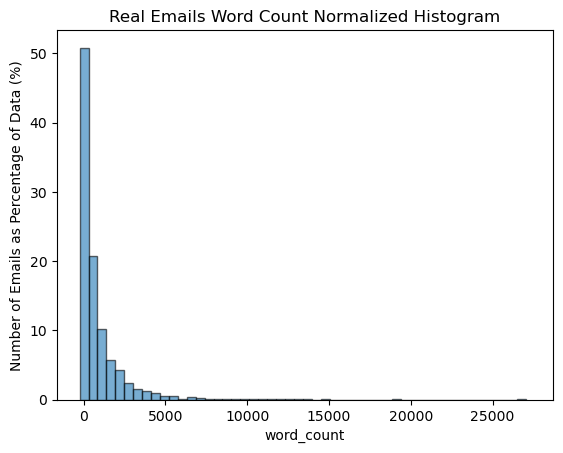

In [43]:
plt.hist(ham_X.word_count, bins=50, density=True, alpha=0.6, color='g')

# Normalize the histogram by scaling the bin heights as percentages
counts, bins, patches = plt.hist(ham_X.word_count, bins=50, density=True, alpha=0.6, color='g')

# Convert density to percentage
bin_width = bins[1] - bins[0]
percentage_counts = counts * bin_width * 100

# Plot percentage histogram
plt.bar(bins[:-1], percentage_counts, width=bin_width, edgecolor='k', alpha=0.6)

# Add labels and title
plt.ylabel('Number of Emails as Percentage of Data (%)')
plt.xlabel('word_count')
plt.title('Real Emails Word Count Normalized Histogram')

plt.show()

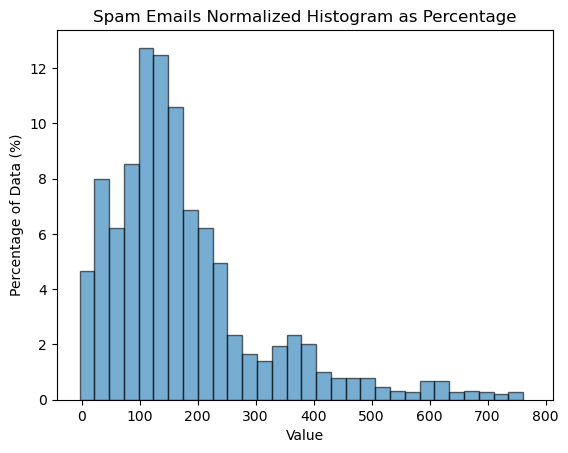

In [131]:
plt.hist(spam_X.num_unique_words, bins=30, density=True, alpha=0.6, color='g')

# Normalize the histogram by scaling the bin heights as percentages
counts, bins, patches = plt.hist(spam_X.num_unique_words, bins=30, density=True, alpha=0.6, color='g')

# Convert density to percentage
bin_width = bins[1] - bins[0]
percentage_counts = counts * bin_width * 100

# Plot percentage histogram
plt.bar(bins[:-1], percentage_counts, width=bin_width, edgecolor='k', alpha=0.6)

# Add labels and title
plt.ylabel('Percentage of Data (%)')
plt.xlabel('Value')
plt.title('Spam Emails Normalized Histogram as Percentage')

plt.show()

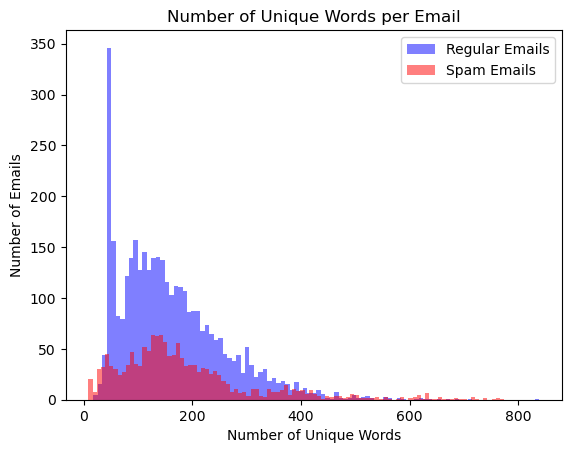

In [126]:
plt.hist(ham_X.num_unique_words,bins=100, alpha=0.5, label='Regular Emails', color='blue')
plt.hist(spam_X.num_unique_words, bins=100,alpha=0.5, label='Spam Emails', color='red')

plt.title('Number of Unique Words per Email')
plt.xlabel('Number of Unique Words')
plt.ylabel('Number of Emails')

plt.legend()

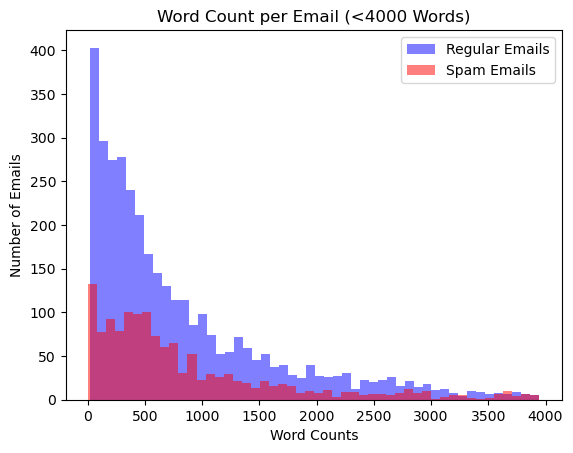

In [116]:
plt.hist(ham_X.word_count[ham_X.word_count < 4000], bins=50, alpha=0.5, label='Regular Emails', color='blue')
plt.hist(spam_X.word_count[spam_X.word_count < 4000], bins=50, alpha=0.5, label='Spam Emails', color='red')

plt.title('Word Count per Email (<4000 Words)')
plt.xlabel('Word Counts')
plt.ylabel('Number of Emails')

plt.legend()

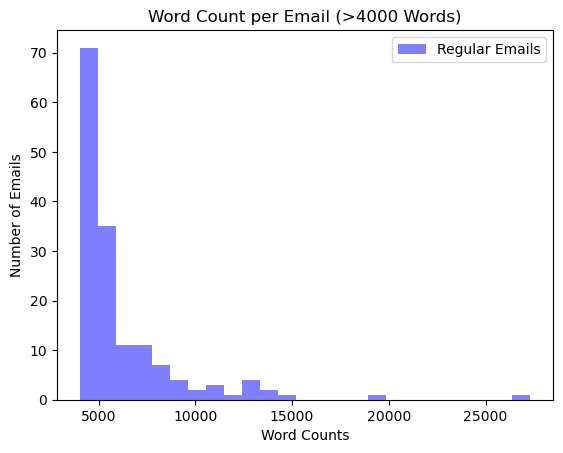

In [117]:
plt.hist(ham_X.word_count[ham_X.word_count > 4000], bins=25, alpha=0.5, label='Regular Emails', color='blue')
#plt.hist(spam_X.word_count[spam_X.word_count > 4000], bins=25, alpha=0.5, label='Spam Emails', color='red')

plt.title('Word Count per Email (>4000 Words)')
plt.xlabel('Word Counts')
plt.ylabel('Number of Emails')

plt.legend()

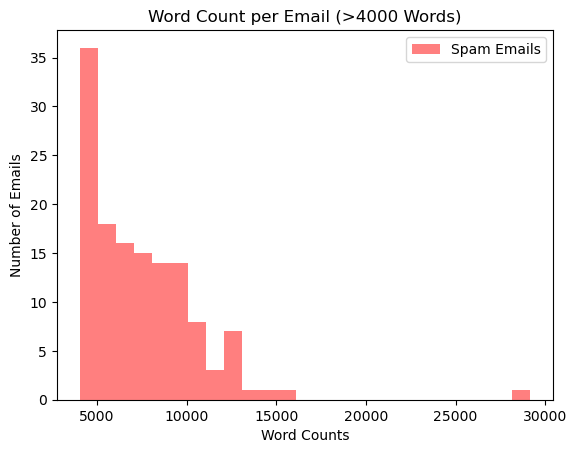

In [118]:
#
plt.hist(spam_X.word_count[spam_X.word_count > 4000], bins=25, alpha=0.5, label='Spam Emails', color='red')

plt.title('Word Count per Email (>4000 Words)')
plt.xlabel('Word Counts')
plt.ylabel('Number of Emails')

plt.legend()

In [26]:
ham_X.word_count.describe()

count     3672.000000
mean      1045.391885
std       1478.040779
min         21.000000
25%        244.000000
50%        551.500000
75%       1293.750000
max      27319.000000
Name: word_count, dtype: float64

In [27]:
spam_X.word_count.describe()

count     1500.000000
mean      1458.798667
std       2283.846640
min          8.000000
25%        316.000000
50%        632.000000
75%       1506.000000
max      29178.000000
Name: word_count, dtype: float64

In [122]:
ham_X.num_unique_words.describe()

count    3672.000000
mean      161.909586
std       100.071467
min        18.000000
25%        87.000000
50%       142.000000
75%       214.000000
max       839.000000
Name: num_unique_words, dtype: float64

In [123]:
spam_X.num_unique_words.describe()

count    1500.000000
mean      189.834000
std       136.475793
min         9.000000
25%       103.000000
50%       155.000000
75%       234.000000
max       774.000000
Name: num_unique_words, dtype: float64

Spam and Ham emails both have similar distributions of # of unique words. There is just more Ham emails in the dataset than Spam emails.

In [46]:
from sklearn.feature_selection import chi2
import pandas as pd

# Assuming X is your word count feature matrix and y is your binary spam label
chi_scores, p_values = chi2(X, y)

# Create a DataFrame to see which features are significant
chi_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'p-value': p_values})
#chi_significant_words = chi_df[chi_df['p-value'] < 0.05]  # Select features with p-value < 0.05

#chi_significant_words[:10]

In [47]:
chi_df.sort_values(by='Chi2 Score', ascending=False).head(50)

,Feature,Chi2 Score,p-value
3000,word_count,156191.284918,0.000000e+00
14,i,20933.845216,0.000000e+00
23,s,9905.907062,0.000000e+00
173,r,9581.168541,0.000000e+00
6,a,8297.355495,0.000000e+00
138,o,7767.524289,0.000000e+00
275,n,6818.365184,0.000000e+00
40,e,6309.085868,0.000000e+00
129,p,6102.448757,0.000000e+00
54,t,5700.608037,0.000000e+00


In [51]:
chi_df.sort_values(by='Chi2 Score').head(25)

,Feature,Chi2 Score,p-value
1830,launch,0.000027,0.995855
478,field,0.000048,0.994452
2113,taxes,0.000056,0.994044
2109,pretty,0.000056,0.994044
2876,forecast,0.000056,0.994044
2830,brief,0.000281,0.986621
848,completed,0.000419,0.983664
563,already,0.000605,0.980370
337,pay,0.000704,0.978835
742,cannot,0.001574,0.968353


In [43]:
chi_significant_words[chi_significant_words['p-value'] < 0.05].sort_values(by='Chi2 Score', ascending=False).head(25)

,Feature,Chi2 Score,p-value
3000,word_count,156191.284918,0.0
14,i,20933.845216,0.0
23,s,9905.907062,0.0
173,r,9581.168541,0.0
6,a,8297.355495,0.0
138,o,7767.524289,0.0
275,n,6818.365184,0.0
40,e,6309.085868,0.0
129,p,6102.448757,0.0
54,t,5700.608037,0.0


In [52]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Fit logistic regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X, y)

# Extract coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
significant_words_lr = coef_df.sort_values(by='Coefficient', ascending=False)

#print(significant_words_lr.head(10))  # Top 10 words most associated with spam

C:\Users\mitch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
significant_words_lr.set_index('Feature')[:25]

,Coefficient
Feature,
one,1.206206
z,1.083168
mo,1.017817
rm,0.963883
men,0.939673
ali,0.838998
sa,0.837437
ur,0.804109
ca,0.800978


In [55]:
significant_words_lr.set_index('Feature').sort_values(by='Coefficient').head(25)

,Coefficient
Feature,
enron,-2.076216
hpl,-1.256958
hp,-1.007039
deal,-0.907440
tax,-0.873753
attached,-0.800511
have,-0.731578
nom,-0.723420
hou,-0.720882


In [89]:
significant_words[:25]

,Feature,Chi2 Score,p-value
1,to,232.118330,2.057687e-52
2,ect,2916.057301,0.000000e+00
3,and,803.818986,7.975305e-177
5,of,2971.842630,0.000000e+00
6,a,8297.355495,0.000000e+00
7,you,662.489075,4.295590e-146
8,hou,2042.735481,0.000000e+00
9,in,4304.410057,0.000000e+00
10,on,497.174452,3.915219e-110
11,is,1030.138618,5.050251e-226


In [56]:
from scipy.stats import pointbiserialr
import pandas as pd

correlations = []
p_values = []

# Calculate Point Biserial Correlation for each word count feature
for col in X.columns:
    corr, p_value = pointbiserialr(X[col], y)
    correlations.append(corr)
    p_values.append(p_value)

# Create a DataFrame to store results
corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation': correlations, 'p-value': p_values})

# Sort by negative correlation to see the strongest inverse relationships
inverse_correlated_words = corr_df.sort_values(by='Correlation')

inverse_correlated_words.set_index('Feature').head(25)

,Correlation,p-value
Feature,,
thanks,-0.271433,4.926148e-88
hpl,-0.266518,7.952302e-85
hanks,-0.266070,1.547126e-84
thank,-0.262384,3.521933e-82
attached,-0.236558,1.048551e-66
daren,-0.236180,1.711801e-66
forwarded,-0.230765,1.761133e-63
subject,-0.227754,7.714997e-62
hp,-0.225846,8.229589e-61


In [57]:
inverse_correlated_words.set_index('Feature').sort_values(by='Correlation', ascending=False).head(25)

,Correlation,p-value
Feature,,
more,0.258152,1.607936e-79
our,0.228187,4.495713e-62
able,0.222219,6.968407e-59
best,0.221703,1.301847e-58
ur,0.220253,7.483086e-58
sex,0.220092,9.079039e-58
sec,0.217402,2.241652e-56
money,0.217215,2.799293e-56
soft,0.213382,2.498362e-54


In [58]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Compute mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
significant_words = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

In [59]:
significant_words

,Feature,Mutual Information
13,enron,0.123395
37,hpl,0.104083
68,daren,0.087726
92,http,0.067535
317,subject,0.064959
...,...,...
1385,spinnaker,0.000000
2299,movies,0.000000
1384,model,0.000000
2301,shareholder,0.000000


In [60]:
from scipy.stats import pointbiserialr
import pandas as pd

correlations = []
p_values = []

# Calculate Point Biserial Correlation for each word count feature
for col in X.columns:
    corr, p_value = pointbiserialr(X[col], y)
    correlations.append(corr)
    p_values.append(p_value)

# Create a DataFrame to store results
corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation': correlations, 'p-value': p_values})

# Sort by absolute correlation to see the strongest relationships
significant_words_pbsr = corr_df[corr_df['p-value'] < 0.05].sort_values(by='Correlation', ascending=False)

significant_words_pbsr

,Feature,Correlation,p-value
99,more,0.258152,1.607936e-79
42,our,0.228187,4.495713e-62
363,able,0.222219,6.968407e-59
290,best,0.221703,1.301847e-58
2833,ur,0.220253,7.483086e-58
...,...,...,...
81,attached,-0.236558,1.048551e-66
785,thank,-0.262384,3.521933e-82
418,hanks,-0.266070,1.547126e-84
37,hpl,-0.266518,7.952302e-85


# 25 Least 'Spammy' Words

In [61]:
significant_words_pbsr.sort_values(by='Correlation')[:25]

,Feature,Correlation,p-value
160,thanks,-0.271433,4.926148e-88
37,hpl,-0.266518,7.952302e-85
418,hanks,-0.266070,1.547126e-84
785,thank,-0.262384,3.521933e-82
81,attached,-0.236558,1.048551e-66
68,daren,-0.236180,1.711801e-66
52,forwarded,-0.230765,1.761133e-63
317,subject,-0.227754,7.714997e-62
2311,hp,-0.225846,8.229589e-61
2868,aren,-0.206063,1.041754e-50


# 25 Most Spammy Words 